# Gradient Boosting

O Gradient Boosting é uma técnica de aprendizado de máquina baseada em ensemble que constrói um modelo preditivo forte a partir de uma coleção de modelos preditivos fracos. A ideia central é combinar vários estimadores simples (geralmente árvores de decisão rasas) sequencialmente, onde cada novo modelo é treinado para corrigir os erros do modelo anterior.

## Funcionamento:
- **Inicialização:** Inicialmente, o algoritmo ajusta um modelo simples aos dados de treinamento. Isso pode ser um modelo constante (por exemplo, a média das respostas) ou um modelo simples, como uma árvore de decisão com poucas divisões.

- **Iteração:** Em cada iteração subsequente, o algoritmo ajusta um novo modelo para os resíduos (diferença entre as previsões atuais e os rótulos verdadeiros) do modelo anterior. O objetivo é minimizar os resíduos residuais.

- **Combinação de Modelos:** Os modelos são combinados aditivamente, o que significa que as previsões finais são obtidas somando as previsões de todos os modelos individuais.

## Gradiente Descendente:
O termo "gradiente" em Gradient Boosting refere-se ao uso do gradiente da função de perda (loss function) em relação às previsões do modelo. O algoritmo ajusta cada modelo subsequente na direção do gradiente negativo da função de perda, tentando reduzir a perda global.

## Regularização:
Para evitar overfitting, é comum aplicar regularização durante o treinamento do Gradient Boosting. Isso pode ser feito limitando o número de iterações (número de modelos no ensemble), ajustando a taxa de aprendizado (learning rate) ou usando árvores de decisão rasas (evitando árvores profundas que podem se ajustar muito bem aos dados de treinamento).

## Implementação no scikit-learn:
O GradientBoostingClassifier do scikit-learn é uma implementação eficiente e fácil de usar do Gradient Boosting para tarefas de classificação. Ele permite configurar diversos hiperparâmetros, como o número de estimadores (número de modelos no ensemble), a profundidade máxima das árvores de decisão, a taxa de aprendizado, entre outros.

## Vantagens:
- **Poder Preditivo:** O Gradient Boosting geralmente produz modelos com alta precisão devido à sua capacidade de ajustar modelos complexos.

- **Flexibilidade:** Pode ser aplicado a uma variedade de problemas de aprendizado supervisionado e é robusto a outliers e ruído nos dados.

## Limitações:
- **Sensibilidade a Hiperparâmetros:** O desempenho do Gradient Boosting pode depender fortemente da escolha dos hiperparâmetros, como a taxa de aprendizado e o número de estimadores.

- **Computacionalmente Intensivo:** Treinar um Gradient Boosting pode ser computacionalmente caro, especialmente com um grande número de estimadores.


# Parâmetros para o `GradientBoostingClassifier` do scikit-learn:

1. `loss`: A função de perda a ser otimizada. Pode ser "deviance" para classificação com perda de desvio ou "exponential" para classificação com perda exponencial.

2. `learning_rate`: Taxa de aprendizado, controla a contribuição de cada árvore na correção dos erros cometidos pelas árvores anteriores. Um valor menor geralmente resulta em um modelo mais robusto, mas requer mais árvores no ensemble.

3. `n_estimators`: O número de árvores de decisão no ensemble.

4. `subsample`: A fração de amostras a serem usadas para ajustar cada árvore. Um valor menor resulta em um modelo mais robusto, reduzindo o overfitting.

5. `criterion`: A função para medir a qualidade de uma divisão. Pode ser "friedman_mse" para o erro médio quadrático de Friedman com melhoria potencial ou "mse" para o erro médio quadrático.

6. `min_samples_split`: O número mínimo de amostras necessárias para dividir um nó interno.

7. `min_samples_leaf`: O número mínimo de amostras necessárias para estar em um nó folha.

8. `min_weight_fraction_leaf`: A fração mínima ponderada do total de pesos das amostras de entrada necessárias para estar em um nó folha.

9. `max_depth`: A profundidade máxima das árvores de decisão.

10. `min_impurity_decrease`: Um nó será dividido se essa divisão induzir uma diminuição da impureza maior ou igual a esse valor.

11. `min_impurity_split`: Limiar de impureza para parar o crescimento da árvore. Um nó será dividido se sua impureza for maior que o limiar, caso contrário, será uma folha.

12. `init`: O estimador inicial a ser usado. Por padrão, é uma árvore de decisão.

13. `random_state`: Determina a semente usada pelo gerador de números aleatórios para garantir que os resultados sejam reproduzíveis.

14. `max_features`: O número de features a serem consideradas ao procurar a melhor divisão. 

15. `verbose`: Controla a verbosidade da saída durante o ajuste.

16. `max_leaf_nodes`: O número máximo de folhas permitidas em cada árvore.

17. `warm_start`: Se definido como True, reutiliza a solução da chamada anterior para ajustar e adiciona mais estimadores ao conjunto de árvores existente. 

18. `presort`: Se deve pré-ordenar os dados para acelerar o processo de ajuste.

Para o `GradientBoostingRegressor` adiciona:

`alpha`: O parâmetro de regularização L1 (somente para loss='huber').

Importando bibliotecas

In [1]:
import gsidiag as gd
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [25]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import confusion_matrix, classification_report

from mpl_toolkits.axes_grid1 import make_axes_locatable
import geopandas as gpd

from itertools import combinations
from itertools import cycle
import seaborn as sns



Definindo parâmetros para o uso do readDiag

In [3]:
#DIRdiag = "/home/patrick/readDiag/data"
DIRdiag = "/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout"
#D:\ftp1.cptec.inpe.br\pesquisa\das\joao.gerd\EXP18\GSI\dataout
varName = "amsua"
varType = "n15"
dateIni="2020010100" 
dateFin="2020010206" 
nHour = "6"          
vminOMA = -2.0       
vmaxOMA = 2.0        
vminSTD = 0.0        
vmaxSTD = 14.0       
Level = 1000
Lay = None           
SingleL = "All" 

datei = datetime.strptime(str(dateIni), "%Y%m%d%H")
datef = datetime.strptime(str(dateFin), "%Y%m%d%H")
dates = [dates.strftime('%Y%m%d%H') for dates in pd.date_range(datei, datef,freq="6H").tolist()]

print(dates)


['2020010100', '2020010106', '2020010112', '2020010118', '2020010200', '2020010206']


Encontrando e listando arquivos para serem usados

In [4]:
paths, pathsc = [], []

OuterL = "01"        
[paths.append(DIRdiag+"/"+dt+"/diag_amsua_n15_"+OuterL+"."+dt) for dt in dates]

OuterLc = "03"
[pathsc.append(DIRdiag+"/"+dt+"/diag_amsua_n15_"+OuterLc+"."+dt) for dt in dates]

print(paths)
print("")
print(pathsc)

['/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010100/diag_amsua_n15_01.2020010100', '/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010106/diag_amsua_n15_01.2020010106', '/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010112/diag_amsua_n15_01.2020010112', '/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010118/diag_amsua_n15_01.2020010118', '/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010200/diag_amsua_n15_01.2020010200', '/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010206/diag_amsua_n15_01.2020010206']

['/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010100/diag_amsua_n15_03.2020010100', '/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010106/diag_amsua_n15_03.2020010106', '/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010112/diag_amsua_n15_03.2020010112', '/mnt/d

Lendo arquivos listado usando o readDiag e concatenando os dados

In [5]:
# Define uma variável booleana 'read' como True para indicar que a leitura dos arquivos será realizada
read = True

# Verifica se 'read' é True para prosseguir com a leitura dos arquivos
if read:        
    # Inicializa uma lista vazia para armazenar os objetos gdf
    gdf_list = []
    # Imprime uma mensagem informando o tempo estimado necessário para a leitura dos arquivos
    print("")
    print("Aguarde, o tempo total estimado para a leitura dos arquivos é de "+
          str(int((float(len(paths))*20 )/60))+" minutos e "+
          str(int((float(len(paths))*20 )%60))+" segundos.")
    print("")
    # Itera sobre os caminhos dos arquivos e seus caminhos de configuração correspondentes
    for path, pathc in zip(paths,pathsc):
        # Imprime uma mensagem indicando o arquivo que está sendo lido
        print("Reading "+path)
        # Lê o arquivo usando a função read_diag do módulo gsidiag e armazena o objeto retornado em gdf
        gdf = gd.read_diag(path,pathc)
        # Adiciona o objeto gdf à lista gdf_list
        gdf_list.append(gdf)

    # Imprime a lista de objetos gdf lidos
    print(gdf_list)
    
    # Define uma string separadora para uso posterior
    separator = " ====================================================================================================="



Aguarde, o tempo total estimado para a leitura dos arquivos é de 2 minutos e 0 segundos.

Reading /mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010100/diag_amsua_n15_01.2020010100
 
>>> GSI DIAG <<<
 
Reading /mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010106/diag_amsua_n15_01.2020010106
 
>>> GSI DIAG <<<
 
Reading /mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010112/diag_amsua_n15_01.2020010112
 
>>> GSI DIAG <<<
 
Reading /mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010118/diag_amsua_n15_01.2020010118
 
>>> GSI DIAG <<<
 
Reading /mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010200/diag_amsua_n15_01.2020010200
 
>>> GSI DIAG <<<
 
Reading /mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010206/diag_amsua_n15_01.2020010206
 
>>> GSI DIAG <<<
 
[<gsidiag.__main__.read_diag object at 0x7fbd51ab2350>, <gsidiag.__main__.read_diag object at

In [6]:
# Inicialização de DataFrame vazio para armazenar dados concatenados
df_concatenado2 = pd.DataFrame()

# Iteração sobre objetos em gdf_list
for objeto in gdf_list:
        
    print(separator)
    print("Separando dados do arquivo" + str(objeto._diagFile))
    
    # Criação de dicionário de dados a partir do objeto   
    dados_dict = {
            'lat': objeto.obsInfo[varName].loc[varType].lat,
            'lon': objeto.obsInfo[varName].loc[varType].lon,
            'elev': objeto.obsInfo[varName].loc[varType].elev,
            'nchan': objeto.obsInfo[varName].loc[varType].nchan,
            'time': objeto.obsInfo[varName].loc[varType].time,
            'iuse': objeto.obsInfo[varName].loc[varType].iuse,
            'idqc': objeto.obsInfo[varName].loc[varType].idqc,
            'inverr': objeto.obsInfo[varName].loc[varType].inverr,
            'oer': objeto.obsInfo[varName].loc[varType].oer,
            'obs': objeto.obsInfo[varName].loc[varType].obs,
            'omf': objeto.obsInfo[varName].loc[varType].omf,
            'omf_nobc': objeto.obsInfo[varName].loc[varType].omf_nobc,
            'emiss': objeto.obsInfo[varName].loc[varType].emiss,
            'oma': objeto.obsInfo[varName].loc[varType].oma,
            'oma_nobc': objeto.obsInfo[varName].loc[varType].oma_nobc,
            'imp': objeto.obsInfo[varName].loc[varType].imp,
            'dfs': objeto.obsInfo[varName].loc[varType].dfs
            }
        
    # Conversão do dicionário em DataFrame
    df_objeto = pd.DataFrame(dados_dict)
        
    # Concatenação do DataFrame do objeto com o DataFrame concatenado
    df_concatenado2 = pd.concat([df_concatenado2, df_objeto], ignore_index=True)
    

Separando dados do arquivo/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010100/diag_amsua_n15_01.2020010100
Separando dados do arquivo/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010106/diag_amsua_n15_01.2020010106
Separando dados do arquivo/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010112/diag_amsua_n15_01.2020010112
Separando dados do arquivo/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010118/diag_amsua_n15_01.2020010118
Separando dados do arquivo/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010200/diag_amsua_n15_01.2020010200
Separando dados do arquivo/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010206/diag_amsua_n15_01.2020010206


In [7]:
# Remoção de linhas com valores NaN
df_concatenado2.dropna(inplace=True)

# Filtrando os canais sub-representados
df_concatenado2 = df_concatenado2[~df_concatenado2['nchan'].isin([1, 2, 3, 4, 5, 15])]

print(df_concatenado2)

print(separator)


# Define as classes do target discretizado para uso posterior
classes = ['6','7','8','9','10','12','13']

              lat         lon         elev  nchan      time  iuse  idqc  \
5      -87.504501   19.704599  2735.045410    6.0  0.315833  -1.0  -0.0   
6      -87.504501   19.704599  2735.045410    7.0  0.315833   1.0   0.0   
7      -87.504501   19.704599  2735.045410    8.0  0.315833   1.0   0.0   
8      -87.504501   19.704599  2735.045410    9.0  0.315833   1.0   0.0   
9      -87.504501   19.704599  2735.045410   10.0  0.315833   1.0   0.0   
...           ...         ...          ...    ...       ...   ...   ...   
697642  69.849403  359.350891    -0.074034    8.0  1.566111   1.0   0.0   
697643  69.849403  359.350891    -0.074034    9.0  1.566111   1.0   0.0   
697644  69.849403  359.350891    -0.074034   10.0  1.566111   1.0   0.0   
697646  69.849403  359.350891    -0.074034   12.0  1.566111   1.0   0.0   
697647  69.849403  359.350891    -0.074034   13.0  1.566111   1.0   0.0   

          inverr       oer         obs       omf  omf_nobc     emiss  \
5       3.557238  0.281441 

In [8]:
# Use pivot_table() para pivotar os dados
df_pivot2 = df_concatenado2.pivot_table(index=('lat', 'lon'), columns='nchan',
                                        values=('obs', 'oma', 'omf','imp', 'dfs'), aggfunc='mean')

# Resetando o índice para manter 'linha' como uma coluna
df_pivot2.reset_index(inplace=True)

# Remoção de linhas com valores NaN
df_pivot2.dropna(inplace=True)



# Lista de colunas que contêm os valores de DFS para cada canal
cols_dfs = [('dfs', 6.0), ('dfs', 7.0), ('dfs', 8.0), ('dfs', 9.0), ('dfs', 10.0), ('dfs', 12.0), ('dfs', 13.0)]

# Encontrar o canal com o maior valor de DFS em cada linha
df_pivot2['canal_maior_dfs'] = df_pivot2[cols_dfs].idxmax(axis=1).str[1]

# Encontre o nome da coluna com o maior valor em cada linha
max_dfs_column = df_pivot2['dfs'].max(axis=1)

# Crie uma nova coluna no DataFrame com a informação do maior dfs em cada linha
df_pivot2['maior_dfs'] = max_dfs_column




# Lista de colunas que contêm os valores de imp para cada canal
cols_imp = [('imp', 6.0), ('imp', 7.0), ('imp', 8.0), ('imp', 9.0), ('imp', 10.0), ('imp', 12.0), ('imp', 13.0)]

# Encontrar o canal com o maior valor de imp em cada linha
df_pivot2['canal_maior_imp'] = df_pivot2[cols_imp].idxmax(axis=1).str[1]

# Encontre o nome da coluna com o maior valor em cada linha
max_dfs_column = df_pivot2['imp'].max(axis=1)

# Crie uma nova coluna no DataFrame com a informação do maior dfs em cada linha
df_pivot2['maior_imp'] = max_dfs_column


# Visualize o DataFrame com a nova coluna
print(df_pivot2)

             lat         lon       dfs                                \
nchan                              6.0       7.0       8.0       9.0   
0     -87.524902  145.937302 -0.027194  0.035069  0.016915  0.007011   
1     -87.523804  298.361603  0.031081 -0.039069  0.027618 -0.034395   
2     -87.522499   20.437300 -0.014044 -0.163683 -0.183544 -0.051867   
3     -87.518898  299.104401 -0.053606  0.041977  0.044107  0.013228   
4     -87.518501  216.446106  0.033011  0.056615  0.092010 -0.066644   
...          ...         ...       ...       ...       ...       ...   
46473  86.502899   93.599602  0.046166  0.003649  0.024471 -0.069496   
46479  86.572304  141.941498 -0.123083  0.000894  0.000905 -0.045603   
46482  86.586700   80.568298 -0.567365 -0.023826  0.035491 -0.038541   
46486  86.592300   78.411201 -0.547038 -0.112739 -0.050711  0.005150   
46492  86.700699   98.521400 -0.400516 -0.054911 -0.020432  0.022876   

                                          imp  ...       omf   

In [9]:
print(df_pivot2.columns)

MultiIndex([(            'lat',   ''),
            (            'lon',   ''),
            (            'dfs',  6.0),
            (            'dfs',  7.0),
            (            'dfs',  8.0),
            (            'dfs',  9.0),
            (            'dfs', 10.0),
            (            'dfs', 12.0),
            (            'dfs', 13.0),
            (            'imp',  6.0),
            (            'imp',  7.0),
            (            'imp',  8.0),
            (            'imp',  9.0),
            (            'imp', 10.0),
            (            'imp', 12.0),
            (            'imp', 13.0),
            (            'obs',  6.0),
            (            'obs',  7.0),
            (            'obs',  8.0),
            (            'obs',  9.0),
            (            'obs', 10.0),
            (            'obs', 12.0),
            (            'obs', 13.0),
            (            'oma',  6.0),
            (            'oma',  7.0),
            (            

In [10]:
print(df_pivot2)

             lat         lon       dfs                                \
nchan                              6.0       7.0       8.0       9.0   
0     -87.524902  145.937302 -0.027194  0.035069  0.016915  0.007011   
1     -87.523804  298.361603  0.031081 -0.039069  0.027618 -0.034395   
2     -87.522499   20.437300 -0.014044 -0.163683 -0.183544 -0.051867   
3     -87.518898  299.104401 -0.053606  0.041977  0.044107  0.013228   
4     -87.518501  216.446106  0.033011  0.056615  0.092010 -0.066644   
...          ...         ...       ...       ...       ...       ...   
46473  86.502899   93.599602  0.046166  0.003649  0.024471 -0.069496   
46479  86.572304  141.941498 -0.123083  0.000894  0.000905 -0.045603   
46482  86.586700   80.568298 -0.567365 -0.023826  0.035491 -0.038541   
46486  86.592300   78.411201 -0.547038 -0.112739 -0.050711  0.005150   
46492  86.700699   98.521400 -0.400516 -0.054911 -0.020432  0.022876   

                                          imp  ...       omf   

In [11]:
# 1. Preparação dos Dados
X = df_pivot2[['obs', 'oma', 'omf', 'dfs', 'imp', 'lat', 'lon']]
y = df_pivot2[['canal_maior_dfs', 'canal_maior_imp','maior_dfs', 'maior_imp']]

# 2. Divisão dos Dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.iloc[:, :21])

              obs                                                              \
nchan        6.0         7.0         8.0         9.0         10.0        12.0   
31164  236.949997  226.679993  216.279999  205.190002  209.259995  226.250000   
13252  239.199997  229.089996  219.460007  209.949997  213.910004  235.020004   
21232  231.070007  220.320007  209.539993  202.529999  209.080002  228.770004   
39188  228.630005  219.460007  211.179993  204.880005  203.800003  213.259995   
21136  234.800003  223.550003  211.509995  201.720001  208.529999  228.449997   
...           ...         ...         ...         ...         ...         ...   
7372   234.559998  228.820007  225.029999  224.570007  228.139999  242.570007   
12760  230.759995  222.580002  215.229996  212.839996  218.550003  236.779999   
46094  217.940002  212.610001  207.740005  203.380005  204.009995  218.330002   
1307   233.100006  230.880005  231.350006  233.179993  236.479996  250.289993   
17463  239.690002  228.30999

In [12]:
# Inicializa e treina o classificador GradientBoostingClassifier com os parâmetros especificados
GB = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=3, random_state=0).fit(X_train.iloc[:, :21], y_train.iloc[:, 0])

# Calculate predictions on the test set
y_pred = GB.predict(X_test.iloc[:, :21])

print(y_pred)

# Convertendo o array numpy em uma série pandas
y_pred_series1 = pd.Series(y_pred)  # Supondo que você queira contar as repetições do primeiro elemento de cada linha


/home/patrick/anaconda3/envs/readDiag/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/home/patrick/anaconda3/envs/readDiag/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


[ 7.  6. 13. ...  6.  6. 12.]


In [13]:
# Inicializa e treina o classificador GradientBoostingClassifier com os parâmetros especificados
GB2 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=5, random_state=0).fit(X_train.iloc[:, :21], y_train.iloc[:, 1])

# Calculate predictions on the test set
y_pred2 = GB2.predict(X_test.iloc[:, :21])

print(y_pred2)

# Convertendo o array numpy em uma série pandas
y_pred_series2 = pd.Series(y_pred2)  # Supondo que você queira contar as repetições do primeiro elemento de cada linha


/home/patrick/anaconda3/envs/readDiag/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/home/patrick/anaconda3/envs/readDiag/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


[10.  6. 13. ...  6.  9. 12.]


In [14]:
# Inicializa e treina o classificador GradientBoostingClassifier com os parâmetros especificados
GB3 = GradientBoostingRegressor(n_estimators=100, learning_rate=1.0,
    max_depth=5, random_state=0).fit(X_train.iloc[:, :21], y_train.iloc[:, 2])

# Calculate predictions on the test set
y_pred3 = GB3.predict(X_test.iloc[:, :21])

print(y_pred3)

# Convertendo o array numpy em uma série pandas
y_pred_series3 = pd.Series(y_pred3)  # Supondo que você queira contar as repetições do primeiro elemento de cada linha
#y_pred_series2 = pd.Series(y_pred[:, 1])


/home/patrick/anaconda3/envs/readDiag/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


[0.00948409 0.00304719 0.21704048 ... 0.06703942 0.0161147  0.03881998]


/home/patrick/anaconda3/envs/readDiag/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [15]:
# Inicializa e treina o classificador GradientBoostingClassifier com os parâmetros especificados
GB4 = GradientBoostingRegressor(n_estimators=100, learning_rate=1.0,
    max_depth=5, random_state=0).fit(X_train.iloc[:, :21], y_train.iloc[:, 3])

# Calculate predictions on the test set
y_pred4 = GB4.predict(X_test.iloc[:, :21])

print(y_pred4)

# Convertendo o array numpy em uma série pandas
y_pred_series4 = pd.Series(y_pred4)  # Supondo que você queira contar as repetições do primeiro elemento de cada linha


/home/patrick/anaconda3/envs/readDiag/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


[0.00815693 0.08759977 0.61757194 ... 0.24328019 0.23069331 0.0704393 ]


/home/patrick/anaconda3/envs/readDiag/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [16]:
print(df_pivot2)

             lat         lon       dfs                                \
nchan                              6.0       7.0       8.0       9.0   
0     -87.524902  145.937302 -0.027194  0.035069  0.016915  0.007011   
1     -87.523804  298.361603  0.031081 -0.039069  0.027618 -0.034395   
2     -87.522499   20.437300 -0.014044 -0.163683 -0.183544 -0.051867   
3     -87.518898  299.104401 -0.053606  0.041977  0.044107  0.013228   
4     -87.518501  216.446106  0.033011  0.056615  0.092010 -0.066644   
...          ...         ...       ...       ...       ...       ...   
46473  86.502899   93.599602  0.046166  0.003649  0.024471 -0.069496   
46479  86.572304  141.941498 -0.123083  0.000894  0.000905 -0.045603   
46482  86.586700   80.568298 -0.567365 -0.023826  0.035491 -0.038541   
46486  86.592300   78.411201 -0.547038 -0.112739 -0.050711  0.005150   
46492  86.700699   98.521400 -0.400516 -0.054911 -0.020432  0.022876   

                                          imp  ...       omf   

In [17]:
# Contando as repetições e imprimindo a ordem
repeticoes1 = y_pred_series1.value_counts()
repeticoes2 = y_pred_series2.value_counts()

# Contando as repetições e imprimindo a ordem
repeticoes3 = y_pred_series3.mean()
repeticoes4 = y_pred_series4.mean()



# Visualize the channels classified based on the predictions
print("Channels classified based on predictions for 'dfs':")
print(repeticoes1)

print("\nChannels classified based on predictions for 'imp':")
print(repeticoes2)

# Visualize the channels classified based on the predictions
print("Mean based on predictions for 'dfs':")
print(repeticoes3)

print("\nMean based on predictions for 'imp':")
print(repeticoes4)


Channels classified based on predictions for 'dfs':
6.0     1939
10.0    1133
13.0     992
12.0     957
7.0      936
9.0      925
8.0      789
dtype: int64

Channels classified based on predictions for 'imp':
6.0     1728
13.0    1324
12.0    1084
10.0    1065
9.0      900
7.0      794
8.0      776
dtype: int64
Mean based on predictions for 'dfs':
0.036647057905224066

Mean based on predictions for 'imp':
0.16633961637968683


Matriz de Confusão para:
[[1769   42   14   18   20   13   24]
 [  47  800   30   10   25   18   11]
 [  31   32  681   18   30   19   15]
 [  14   16   19  830   36   14   13]
 [  29   21   22   28  980   19   13]
 [  24   10   13    9   16  851   24]
 [  25   15   10   12   26   23  892]]


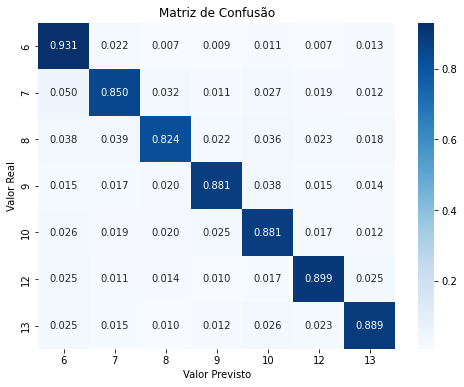

Função MatrizConfusao concluída!
Matriz de Confusão para:
[[1571   31   23   14   20   18   11]
 [  41  662   23   20   21   10   16]
 [  20   29  672   16   17   17   10]
 [  20   14   21  805   22   14    7]
 [  32   21   19   20  951    6   14]
 [  20   18    8   13   15 1001   24]
 [  24   19   10   12   19   18 1242]]


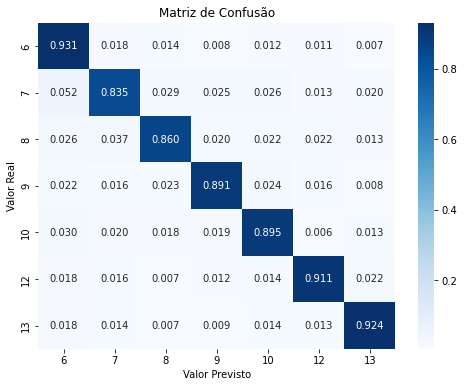

Função MatrizConfusao concluída!


In [18]:
def MatrizConfusao(YTEST, YPRED, CLASSES):
    # Computa a matriz de confusão
    matriz_confusao = confusion_matrix(YTEST, YPRED)

    # Imprime a matriz de confusão
    print(f"Matriz de Confusão para:")
    print(matriz_confusao)

    # Calcula a soma de cada linha da matriz de confusão
    sum_by_class = np.sum(matriz_confusao, axis=1)

    # Normaliza a matriz de confusão
    matriz_confusao_normalized = matriz_confusao / sum_by_class[:, np.newaxis]

    # Plota a matriz de confusão normalizada
    plt.figure(figsize=(8, 6))
    sns.heatmap(matriz_confusao_normalized, annot=True, fmt=".3f", 
                cmap="Blues", xticklabels=CLASSES, yticklabels=CLASSES)
    plt.title(f"Matriz de Confusão")
    plt.xlabel("Valor Previsto")
    plt.ylabel("Valor Real")
    plt.savefig(f"MatrizConfusao.png", facecolor='white')
    plt.show()
    
    print("Função MatrizConfusao concluída!")
    
classes = ['6','7','8','9','10','12','13']
MatrizConfusao(y_test.iloc[:, 0], y_pred_series1, classes)
MatrizConfusao(y_test.iloc[:, 1], y_pred_series2, classes)

In [19]:
# Gera e imprime o relatório de classificação, que inclui métricas como precisão, recall e F1-score
relatorio_classificacao = classification_report(y_test.iloc[:, 0], y_pred_series1)
print("\nRelatório de Classificação DFS:")
print(relatorio_classificacao)

# Gera e imprime o relatório de classificação, que inclui métricas como precisão, recall e F1-score
relatorio_classificacao = classification_report(y_test.iloc[:, 1], y_pred_series2)
print("\nRelatório de Classificação IMP:")
print(relatorio_classificacao)



Relatório de Classificação DFS:
              precision    recall  f1-score   support

         6.0       0.91      0.93      0.92      1900
         7.0       0.85      0.85      0.85       941
         8.0       0.86      0.82      0.84       826
         9.0       0.90      0.88      0.89       942
        10.0       0.86      0.88      0.87      1112
        12.0       0.89      0.90      0.89       947
        13.0       0.90      0.89      0.89      1003

    accuracy                           0.89      7671
   macro avg       0.88      0.88      0.88      7671
weighted avg       0.89      0.89      0.89      7671


Relatório de Classificação IMP:
              precision    recall  f1-score   support

         6.0       0.91      0.93      0.92      1688
         7.0       0.83      0.83      0.83       793
         8.0       0.87      0.86      0.86       781
         9.0       0.89      0.89      0.89       903
        10.0       0.89      0.89      0.89      1063
        12.0

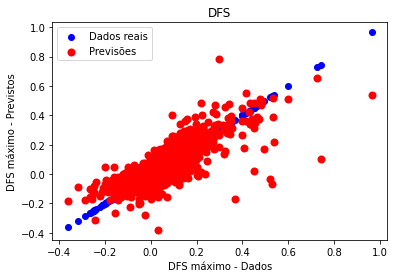

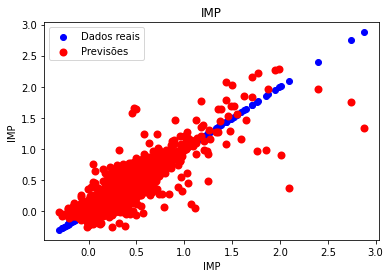

In [20]:
# Plotagem dos dados reais
plt.scatter(X_test.iloc[:, 21:28].max(axis=1), y_test.iloc[:, 2], color='blue', label='Dados reais')

# Plotagem das previsões
plt.scatter(X_test.iloc[:, 21:28].max(axis=1), y_pred3, color='red', linewidth=2, label='Previsões')

plt.xlabel('DFS máximo - Dados')
plt.ylabel('DFS máximo - Previstos')
plt.title('DFS')
plt.legend()
plt.show()

# Plotagem dos dados reais
plt.scatter(X_test.iloc[:, 28:35].max(axis=1), y_test.iloc[:, 3], color='blue', label='Dados reais')

# Plotagem das previsões
plt.scatter(X_test.iloc[:, 28:35].max(axis=1), y_pred4, color='red', linewidth=2, label='Previsões')

plt.xlabel('IMP')
plt.ylabel('IMP')
plt.title('IMP')
plt.legend()
plt.show()


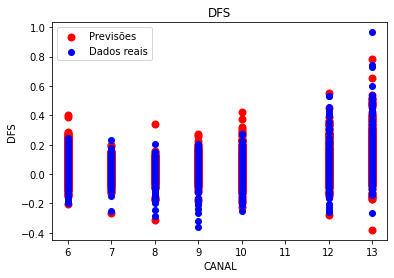

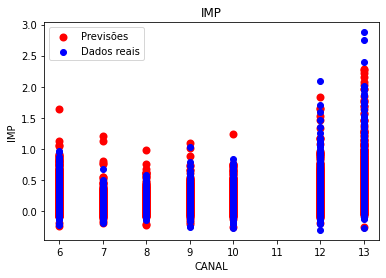

In [21]:
# Plotagem das previsões
plt.scatter(y_pred, y_pred3, color='red', linewidth=2, label='Previsões')

# Plotagem dos dados reais
plt.scatter(y_test.iloc[:, 0], X_test.iloc[:, 21:28].max(axis=1), color='blue', label='Dados reais')

plt.xlabel('CANAL')
plt.ylabel('DFS')
plt.title('DFS')
plt.legend()
plt.show()


# Plotagem das previsões
plt.scatter(y_pred2, y_pred4, color='red', linewidth=2, label='Previsões')

# Plotagem dos dados reais
plt.scatter(y_test.iloc[:, 1], X_test.iloc[:, 28:35].max(axis=1), color='blue', label='Dados reais')

plt.xlabel('CANAL')
plt.ylabel('IMP')
plt.title('IMP')
plt.legend()
plt.show()


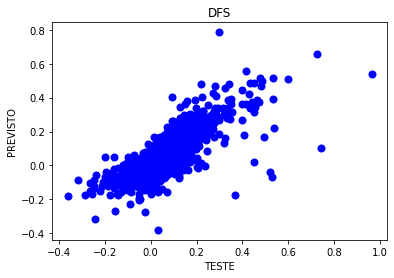

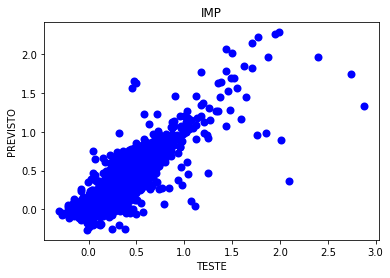

In [22]:
# Plotagem das previsões
plt.scatter(X_test.iloc[:, 21:28].max(axis=1), y_pred3, color='blue', linewidth=2, label='DFS')

# Plotagem das previsões
#plt.scatter(y_pred[:, 0], y_test.iloc[:, 2], color='red', linewidth=2, label='Previsões - y_pred')

plt.xlabel('TESTE')
plt.ylabel('PREVISTO')
plt.title('DFS')
#plt.legend()
plt.show()

# Plotagem das previsões
plt.scatter(X_test.iloc[:, 28:35].max(axis=1), y_pred4, color='blue', linewidth=2, label='IMP')

# Plotagem das previsões
#plt.scatter(y_pred[:, 1], y_test.iloc[:, 3], color='red', linewidth=2, label='Previsões - y_pred')

plt.xlabel('TESTE')
plt.ylabel('PREVISTO')
plt.title('IMP')
#plt.legend()
plt.show()


In [23]:
print(X_test)

              obs                                                              \
nchan         6.0         7.0         8.0         9.0        10.0        12.0   
8556   232.009995  224.940002  220.179993  219.679993  223.770004  243.550003   
17907  233.570007  222.699997  211.669998  203.839996  211.139999  231.389999   
676    229.949997  229.240005  230.000000  233.600006  236.990005  250.809998   
30673  231.639999  221.490005  210.970001  203.610001  210.619995  229.160004   
25684  234.000000  222.889999  211.660004  202.869995  208.190002  226.960007   
...           ...         ...         ...         ...         ...         ...   
10667  236.800003  228.179993  220.639999  215.160004  218.600006  236.000000   
3204   234.460007  230.850006  229.360001  230.139999  232.740005  245.360001   
21811  232.330002  221.399994  209.949997  201.889999  209.149994  228.029999   
38289  233.440002  229.440002  226.350006  225.740005  227.199997  234.009995   
35859  225.149994  218.67999

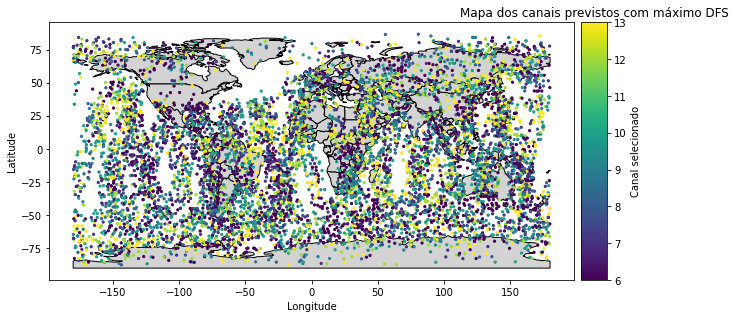

In [26]:
latitude = X_test['lat']
longitude = X_test['lon']
selecchan =  y_pred

# Ajustando a longitude para o intervalo -180 a 180
longitude_adj = np.where(longitude > 180, longitude - 360, longitude)

# Criando um GeoDataFrame com base nos dados ajustados
gdf = gpd.GeoDataFrame(selecchan, geometry=gpd.points_from_xy(longitude_adj, latitude), crs='EPSG:4326')

# Plotagem
fig, ax = plt.subplots(figsize=(10, 6))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)  # Adicionando eixo de cor

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(ax=ax, color='lightgrey', edgecolor='black')
scatter = gdf.plot(ax=ax, column=selecchan, cmap='viridis', markersize=5, legend=True, cax=cax)
scatter.set_xlabel('Longitude')
scatter.set_ylabel('Latitude')
cax.set_ylabel('Canal selecionado')

plt.title('Mapa dos canais previstos com máximo DFS')
plt.show()

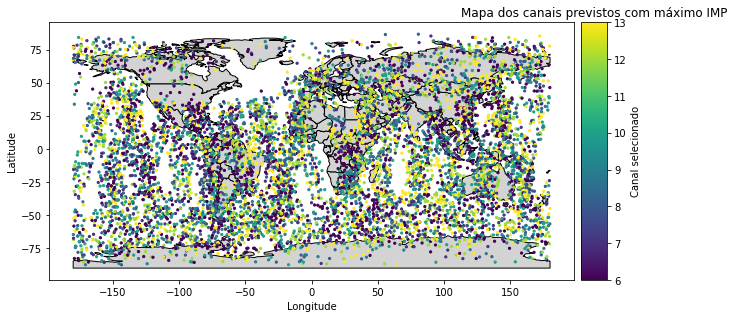

In [27]:
latitude = X_test['lat']
longitude = X_test['lon']
selecchan =  y_pred2

# Ajustando a longitude para o intervalo -180 a 180
longitude_adj = np.where(longitude > 180, longitude - 360, longitude)

# Criando um GeoDataFrame com base nos dados ajustados
gdf = gpd.GeoDataFrame(selecchan, geometry=gpd.points_from_xy(longitude_adj, latitude), crs='EPSG:4326')

# Plotagem
fig, ax = plt.subplots(figsize=(10, 6))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)  # Adicionando eixo de cor

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(ax=ax, color='lightgrey', edgecolor='black')
scatter = gdf.plot(ax=ax, column=selecchan, cmap='viridis', markersize=5, legend=True, cax=cax)
scatter.set_xlabel('Longitude')
scatter.set_ylabel('Latitude')
cax.set_ylabel('Canal selecionado')

plt.title('Mapa dos canais previstos com máximo IMP')
plt.show()

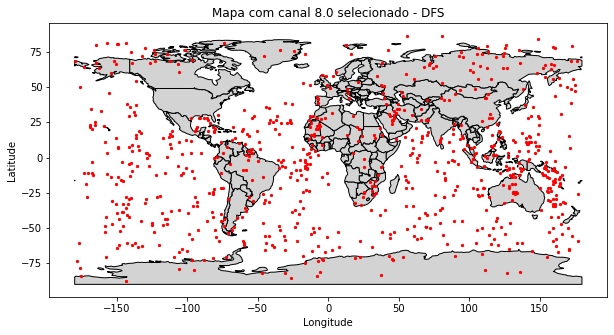

In [28]:
latitude = X_test['lat']
longitude = X_test['lon']
selecchan = y_pred  # Assuming y_pred contains the values you want to plot

# Ajustando a longitude para o intervalo -180 a 180
longitude_adj = np.where(longitude > 180, longitude - 360, longitude)

# Filtrando os dados com base na condição selecchan == 8.0
filtered_latitude = latitude[selecchan == 8.0]
filtered_longitude_adj = longitude_adj[selecchan == 8.0]

# Criando um GeoDataFrame com base nos dados filtrados
geometry = gpd.points_from_xy(filtered_longitude_adj, filtered_latitude)
gdf = gpd.GeoDataFrame(geometry=geometry, crs='EPSG:4326')

# Plotagem
fig, ax = plt.subplots(figsize=(10, 6))
divider = make_axes_locatable(ax)
#cax = divider.append_axes("right", size="5%", pad=0.1)  # Adicionando eixo de cor

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(ax=ax, color='lightgrey', edgecolor='black')
scatter = gdf.plot(ax=ax, color='red', markersize=5)  # Colorindo os pontos filtrados de vermelho

scatter.set_xlabel('Longitude')
scatter.set_ylabel('Latitude')

plt.title('Mapa com canal 8.0 selecionado - DFS')
plt.show()


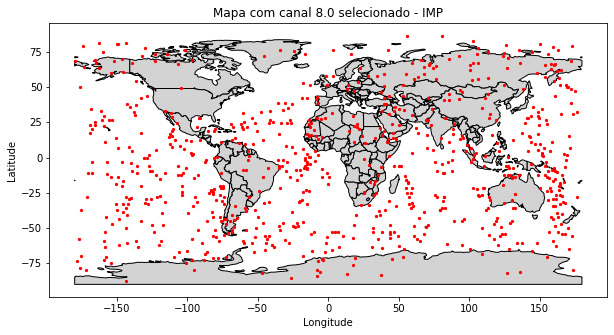

In [29]:
latitude = X_test['lat']
longitude = X_test['lon']
selecchan = y_pred2  # Assuming y_pred contains the values you want to plot

# Ajustando a longitude para o intervalo -180 a 180
longitude_adj2 = np.where(longitude > 180, longitude - 360, longitude)

# Filtrando os dados com base na condição selecchan == 8.0
filtered_latitude2 = latitude[selecchan == 8.0]
filtered_longitude_adj2 = longitude_adj2[selecchan == 8.0]

# Criando um GeoDataFrame com base nos dados filtrados
geometry = gpd.points_from_xy(filtered_longitude_adj2, filtered_latitude2)
gdf = gpd.GeoDataFrame(geometry=geometry, crs='EPSG:4326')

# Plotagem
fig, ax = plt.subplots(figsize=(10, 6))
divider = make_axes_locatable(ax)
#cax = divider.append_axes("right", size="5%", pad=0.1)  # Adicionando eixo de cor

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(ax=ax, color='lightgrey', edgecolor='black')
scatter = gdf.plot(ax=ax, color='red', markersize=5)  # Colorindo os pontos filtrados de vermelho

scatter.set_xlabel('Longitude')
scatter.set_ylabel('Latitude')

plt.title('Mapa com canal 8.0 selecionado - IMP')
plt.show()


/home/patrick/anaconda3/envs/readDiag/lib/python3.7/site-packages/geopandas/base.py:31: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


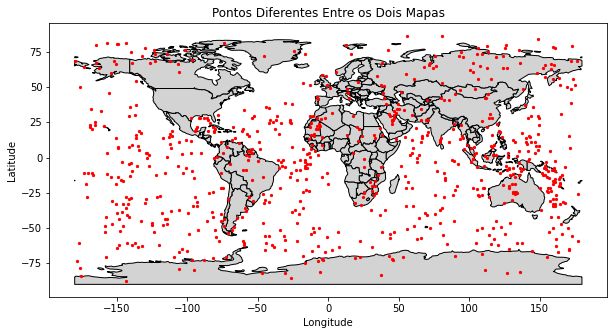

In [30]:
# Carregue os dados do primeiro mapa
gdf1 = gpd.GeoDataFrame(geometry=gpd.points_from_xy(filtered_longitude_adj, filtered_latitude), crs='EPSG:4326')

# Carregue os dados do segundo mapa
gdf2 = gpd.GeoDataFrame(geometry=gpd.points_from_xy(filtered_longitude_adj2, filtered_latitude2), crs='EPSG:4326')

# Encontre a diferença entre os GeoDataFrames
difference = gdf1.geometry.difference(gdf2.geometry)

# Crie um novo GeoDataFrame com os pontos resultantes da diferença
result = gpd.GeoDataFrame(geometry=difference, crs='EPSG:4326')

# Plotagem
fig, ax = plt.subplots(figsize=(10, 6))
divider = make_axes_locatable(ax)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(ax=ax, color='lightgrey', edgecolor='black')

# Plotando os pontos resultantes da diferença
result.plot(ax=ax, color='red', markersize=5)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.title('Pontos Diferentes Entre os Dois Mapas')
plt.show()


/home/patrick/anaconda3/envs/readDiag/lib/python3.7/site-packages/geopandas/base.py:31: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


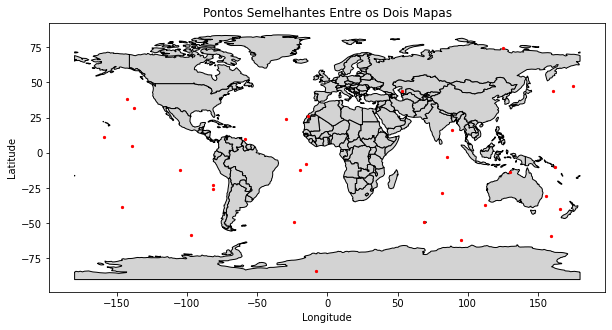

In [31]:
# Encontre a interseção entre os GeoDataFrames
intersection = gdf1.geometry.intersection(gdf2.geometry)

# Crie um novo GeoDataFrame com os pontos resultantes da interseção
result = gpd.GeoDataFrame(geometry=intersection, crs='EPSG:4326')

# Plotagem
fig, ax = plt.subplots(figsize=(10, 6))
divider = make_axes_locatable(ax)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(ax=ax, color='lightgrey', edgecolor='black')

# Plotando os pontos resultantes da interseção
result.plot(ax=ax, color='red', markersize=5)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.title('Pontos Semelhantes Entre os Dois Mapas')
plt.show()

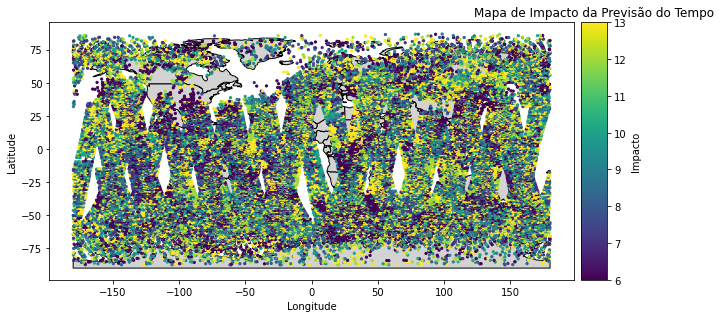

In [32]:
latitude = df_pivot2['lat']
longitude = df_pivot2['lon']
selecchan =  df_pivot2['canal_maior_imp']

# Ajustando a longitude para o intervalo -180 a 180
longitude_adj = np.where(longitude > 180, longitude - 360, longitude)

# Criando um GeoDataFrame com base nos dados ajustados
gdf = gpd.GeoDataFrame(selecchan, geometry=gpd.points_from_xy(longitude_adj, latitude), crs='EPSG:4326')

# Plotagem
fig, ax = plt.subplots(figsize=(10, 6))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)  # Adicionando eixo de cor

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(ax=ax, color='lightgrey', edgecolor='black')
scatter = gdf.plot(ax=ax, column='canal_maior_imp', cmap='viridis', markersize=5, legend=True, cax=cax)
scatter.set_xlabel('Longitude')
scatter.set_ylabel('Latitude')
cax.set_ylabel('Impacto')

plt.title('Mapa de Impacto da Previsão do Tempo')
plt.show()